In [50]:
import sklearn
import numpy as np
import pandas as pd

In [7]:
from sklearn.datasets import load_digits
digit_dataset = load_digits();

<h1>Загрузка и изучение данные load_digits </h1>

In [8]:
print("Ключи digit_dataset: \n{}".format(digit_dataset.keys()))

Ключи digit_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [9]:
print(digit_dataset['DESCR'][:1000]+ "\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [10]:
print(": \n{}".format(digit_dataset['target_names']))

: 
[0 1 2 3 4 5 6 7 8 9]


In [11]:
print("Название признаков: \n{}".format(digit_dataset['feature_names']))
#Датасет load_digits не содержит атрибута feature_names, и данные в нем обычно не имеют имен признаков, как это бывает в некоторых других датасетах. Вместо этого, признаки представлены как интенсивности пикселей на изображениях цифр.

Название признаков: 
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [12]:
print("Тип массива data: {}".format(type(digit_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [13]:
print("Форма массива data: {}".format(digit_dataset['data'].shape))

Форма массива data: (1797, 64)


In [14]:
print("Первые 5 строк массива data: \n{}".format(digit_dataset['data'][:150]))

Первые 5 строк массива data: 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  3. ... 10.  1.  0.]
 [ 0.  0.  6. ...  9.  1.  0.]]


In [15]:
print("Ответы:\n{}".format(digit_dataset['target']))

Ответы:
[0 1 2 ... 8 9 8]


<h1>Метрики эффективности: обучающий и тестовые наборы</h1>

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digit_dataset['data'], digit_dataset['target'], random_state=0)

In [17]:
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))

Форма массива X_train: (1347, 64)
Форма массива y_train: (1347,)


In [18]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_test: (450, 64)
Форма массива y_test: (450,)


<h1>Исследование данных. Визуализация</h1>

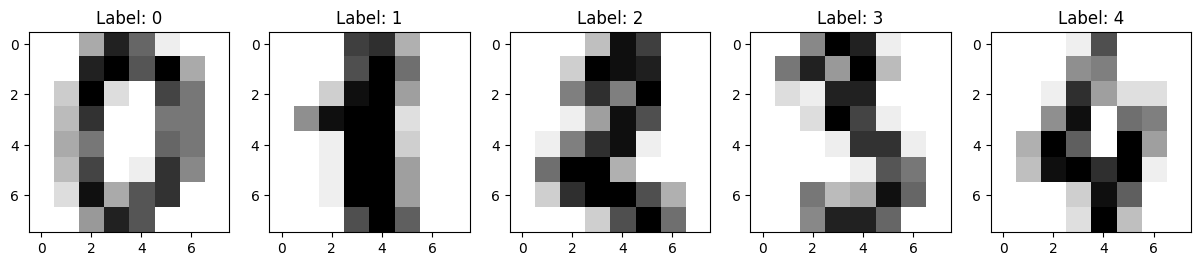

In [118]:
from matplotlib import pyplot as plt

images = digit_dataset.images
labels = digit_dataset.target
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray_r)
    plt.title(f"Label: {labels[i]}")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13112\3934986419.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(digits_X_embedded[:, 0], digits_X_embedded[:, 1], c=y_train, cmap=plt.cm.get_cmap("jet", 10))


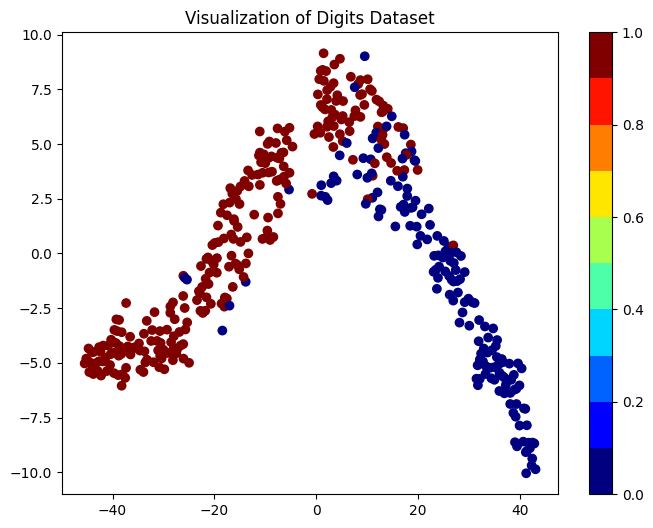

In [140]:
from sklearn.manifold import TSNE

digits_X_embedded = TSNE(n_components=2).fit_transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(digits_X_embedded[:, 0], digits_X_embedded[:, 1], c=y_train, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()
plt.title("Visualization of Digits Dataset")
plt.show()

<h1>Построение модели методом k-ближайших средних</h1>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<h1>Получение прогнозов</h1>

In [26]:
# используем первое изображение из набора)
example = digit_dataset.data[0].reshape(1, -1)
predicted_label = knn.predict(example)
print(f'Прогноз для первого изображения: {predicted_label[0]}')

Прогноз для первого изображения: 0


<h1>Оценка качества модели<h2>

In [131]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора: \n{}".format(y_pred))

Прогнозы для тестового набора: 
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [132]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Оценка качества для digits dataset
digits_accuracy = accuracy_score(y_test, y_pred)
digits_f1 = f1_score(y_test, y_pred, average='weighted')
digits_confusion = confusion_matrix(y_test, y_pred)

print(digits_accuracy)
print(digits_f1)
print(digits_confusion)

0.916083916083916
0.9157381080458002
[[46  7]
 [ 5 85]]


<h1>Загрузка и изучение данные load_wine </h1>

In [133]:
from sklearn.datasets import load_wine
wine_dataset = load_wine();

In [134]:
print("Ключи wine_dataset: \n{}".format(wine_dataset.keys()))

Ключи wine_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [135]:
print(wine_dataset['DESCR'][:1000]+ "\n...")

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [136]:
print("На: \n{}".format(wine_dataset['target_names']))

На: 
['class_0' 'class_1' 'class_2']


In [137]:
print("Название признаков: \n{}".format(wine_dataset['feature_names']))

Название признаков: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [138]:
print("Тип массива data: {}".format(type(wine_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [43]:
print("Форма массива data: {}".format(wine_dataset['data'].shape))

Форма массива data: (178, 13)


In [44]:
print("Первые 5 строк массива data: \n{}".format(wine_dataset['data'][:150]))

Первые 5 строк массива data: 
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.287e+01 4.610e+00 2.480e+00 ... 5.400e-01 1.860e+00 6.250e+02]
 [1.332e+01 3.240e+00 2.380e+00 ... 5.500e-01 1.620e+00 6.500e+02]
 [1.308e+01 3.900e+00 2.360e+00 ... 5.700e-01 1.330e+00 5.500e+02]]


In [45]:
print("Ответы:\n{}".format(wine_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


<h1>Метрики эффективности: обучающий и тестовые наборы wine_load</h1>

In [46]:
wine_X = wine_dataset.data
wine_y = wine_dataset.target
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

In [48]:
print("Форма массива wine_X: {}".format(wine_X_train.shape))
print("Форма массива wine_y: {}".format(wine_y_train.shape))

Форма массива wine_X: (142, 13)
Форма массива wine_y: (142,)


In [49]:
print("Форма массива wine_X_test: {}".format(wine_X_test.shape))
print("Форма массива wine_y_test: {}".format(wine_y_test.shape))

Форма массива wine_X_test: (36, 13)
Форма массива wine_y_test: (36,)


<h1>Исследование данных. Визуализация wine_load</h1>

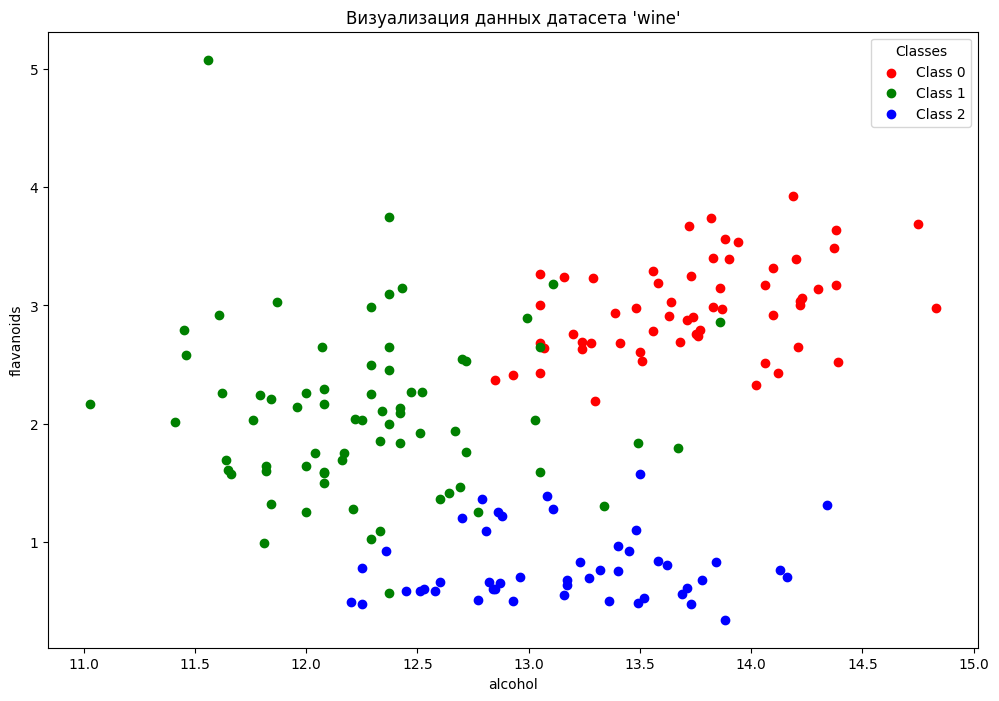

In [51]:
data = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
data['target'] = wine_dataset.target

plt.figure(figsize=(12, 8))

# Выбор двух признаков для визуализации (в этом случае, "alcohol" и "flavanoids")
feature1 = "alcohol"
feature2 = "flavanoids"

colors = ['r', 'g', 'b']

for i in range(3):
    class_data = data[data['target'] == i]
    plt.scatter(class_data[feature1], class_data[feature2], c=colors[i], label=f'Class {i}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title="Classes")
plt.title("Визуализация данных датасета 'wine'")
plt.show()

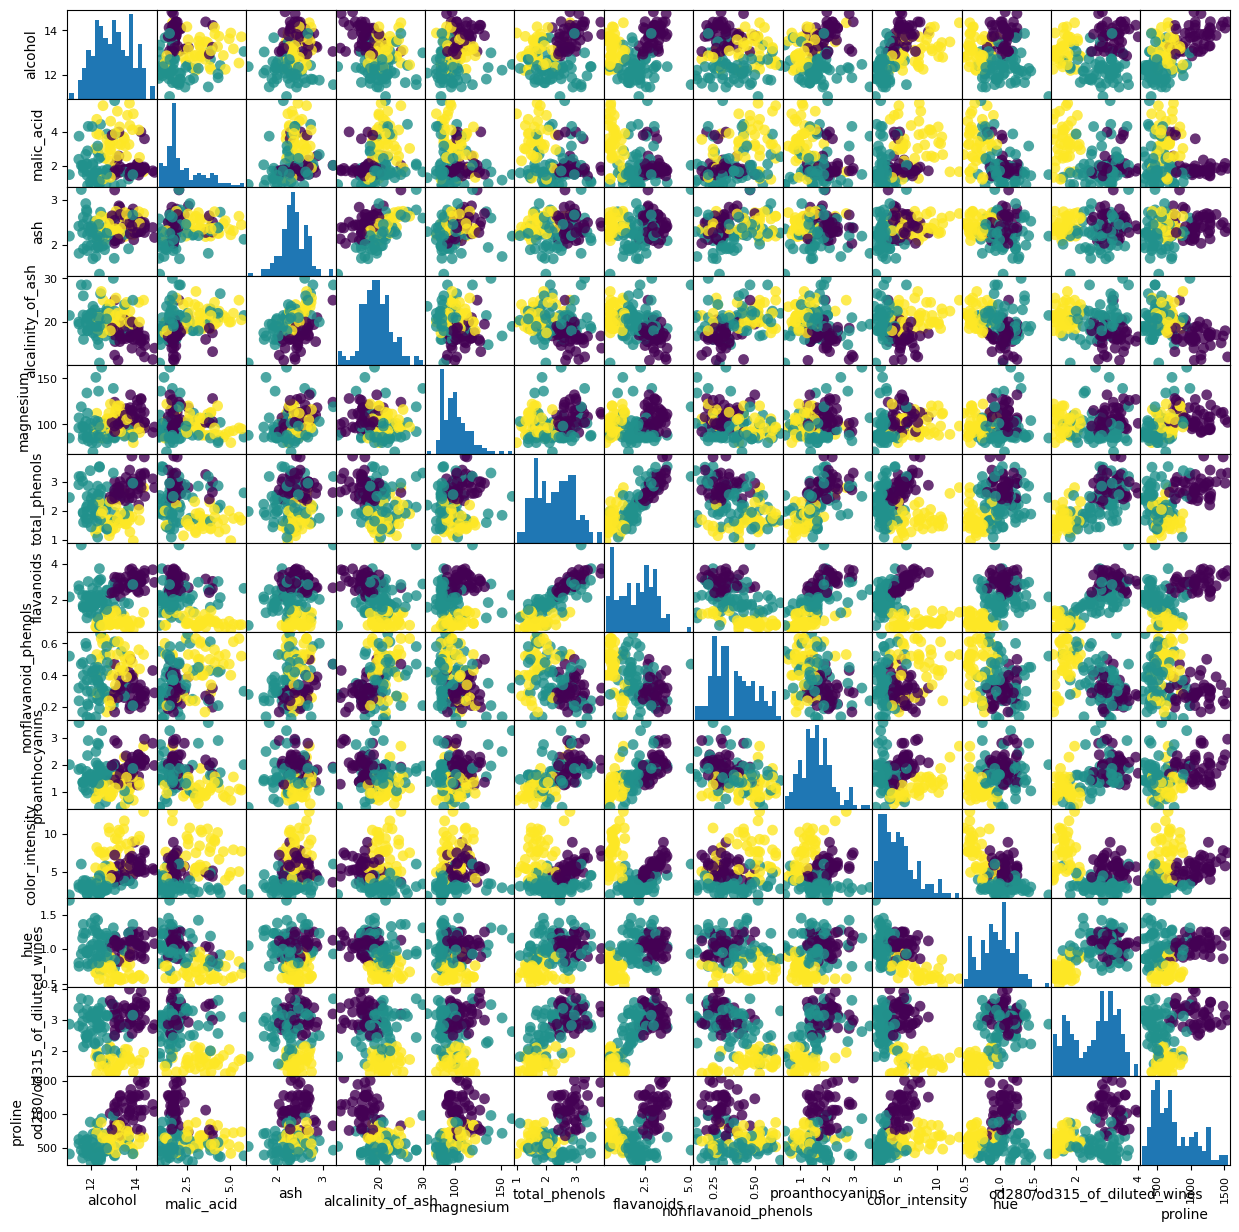

In [59]:
wine_dataframe = pd.DataFrame(wine_X_train, columns=wine_dataset.feature_names)
grr = pd.plotting.scatter_matrix(wine_dataframe, c=wine_y_train, figsize=(15, 15), marker='0', hist_kwds={'bins':20}, s = 60, alpha=.8)

<h1>Построение модели методом k-ближайших средних wine_load</h1>

In [74]:
knn.fit(wine_X_train, wine_y_train)

KNeighborsClassifier(n_neighbors=1)

<h1>Получение прогнозов wine_load</h1>

In [80]:
wine_X_new = np.array([[14.0, 4, 6, 2.5, 9.1, 0.5, 4.5, 5, 2, 7.8, 3.7, 8.8, 6.3]])
print(wine_X_new.shape)

(1, 13)


In [81]:
wine_prediction = knn.predict(wine_X_new)
print("Прогноз: {}".format(wine_prediction))
print("Спрогнозированная метка: {}".format(wine_dataset['target_names'][wine_prediction]))

Прогноз: [1]
Спрогнозированная метка: ['class_1']


<h1>Оценка качества модели wine_load<h2>

In [82]:
wine_y_pred = knn.predict(wine_X_test)
print("Прогнозы для тестового набора: \n{}".format(wine_y_pred))

Прогнозы для тестового набора: 
[2 0 2 0 1 0 1 2 0 0 2 1 0 1 0 1 1 1 0 1 0 1 0 2 1 2 1 0 1 0 0 1 2 0 0 0]


In [83]:
print("Правильность на тестовом наборе:{:.2f}".format(np.mean(wine_y_pred==wine_y_test)))

Правильность на тестовом наборе:0.78


In [84]:
print("Правильность на тестовом наборе:{:.2f}".format(knn.score(wine_X_test, wine_y_test)))

Правильность на тестовом наборе:0.78


<h1>Загрузка и изучение данные load_breast_cancer </h1>

In [85]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer();

In [86]:
print("Ключи : \n{}".format(cancer_dataset.keys()))

Ключи : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [87]:
print(cancer_dataset['DESCR'][:1000]+ "\n...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [88]:
print("На: \n{}".format(cancer_dataset['target_names']))

На: 
['malignant' 'benign']


In [89]:
print("Название признаков: \n{}".format(cancer_dataset['feature_names']))

Название признаков: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [91]:
print("Тип массива data: {}".format(type(cancer_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [92]:
print("Форма массива data: {}".format(cancer_dataset['data'].shape))

Форма массива data: (569, 30)


In [93]:
print("Первые 5 строк массива data: \n{}".format(cancer_dataset['data'][:150]))

Первые 5 строк массива data: 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.495e+01 1.877e+01 9.784e+01 ... 8.405e-02 2.852e-01 9.218e-02]
 [1.444e+01 1.518e+01 9.397e+01 ... 1.599e-01 2.691e-01 7.683e-02]
 [1.374e+01 1.791e+01 8.812e+01 ... 6.019e-02 2.350e-01 7.014e-02]]


In [94]:
print("Ответы:\n{}".format(cancer_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 

<h1>Метрики эффективности: обучающий и тестовые наборы load_breast_cancer</h1>

In [96]:
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(cancer_dataset['data'], cancer_dataset['target'], random_state=0)

In [98]:
print("Форма массива: {}".format(cancer_X_train.shape))
print("Форма массива: {}".format(cancer_y_train.shape))

Форма массива: (426, 30)
Форма массива: (426,)


In [99]:
print("Форма массива: {}".format(cancer_X_test.shape))
print("Форма массива: {}".format(cancer_y_test.shape))

Форма массива: (143, 30)
Форма массива: (143,)


<h1>Исследование данных. Визуализация load_breast_cancer</h1>

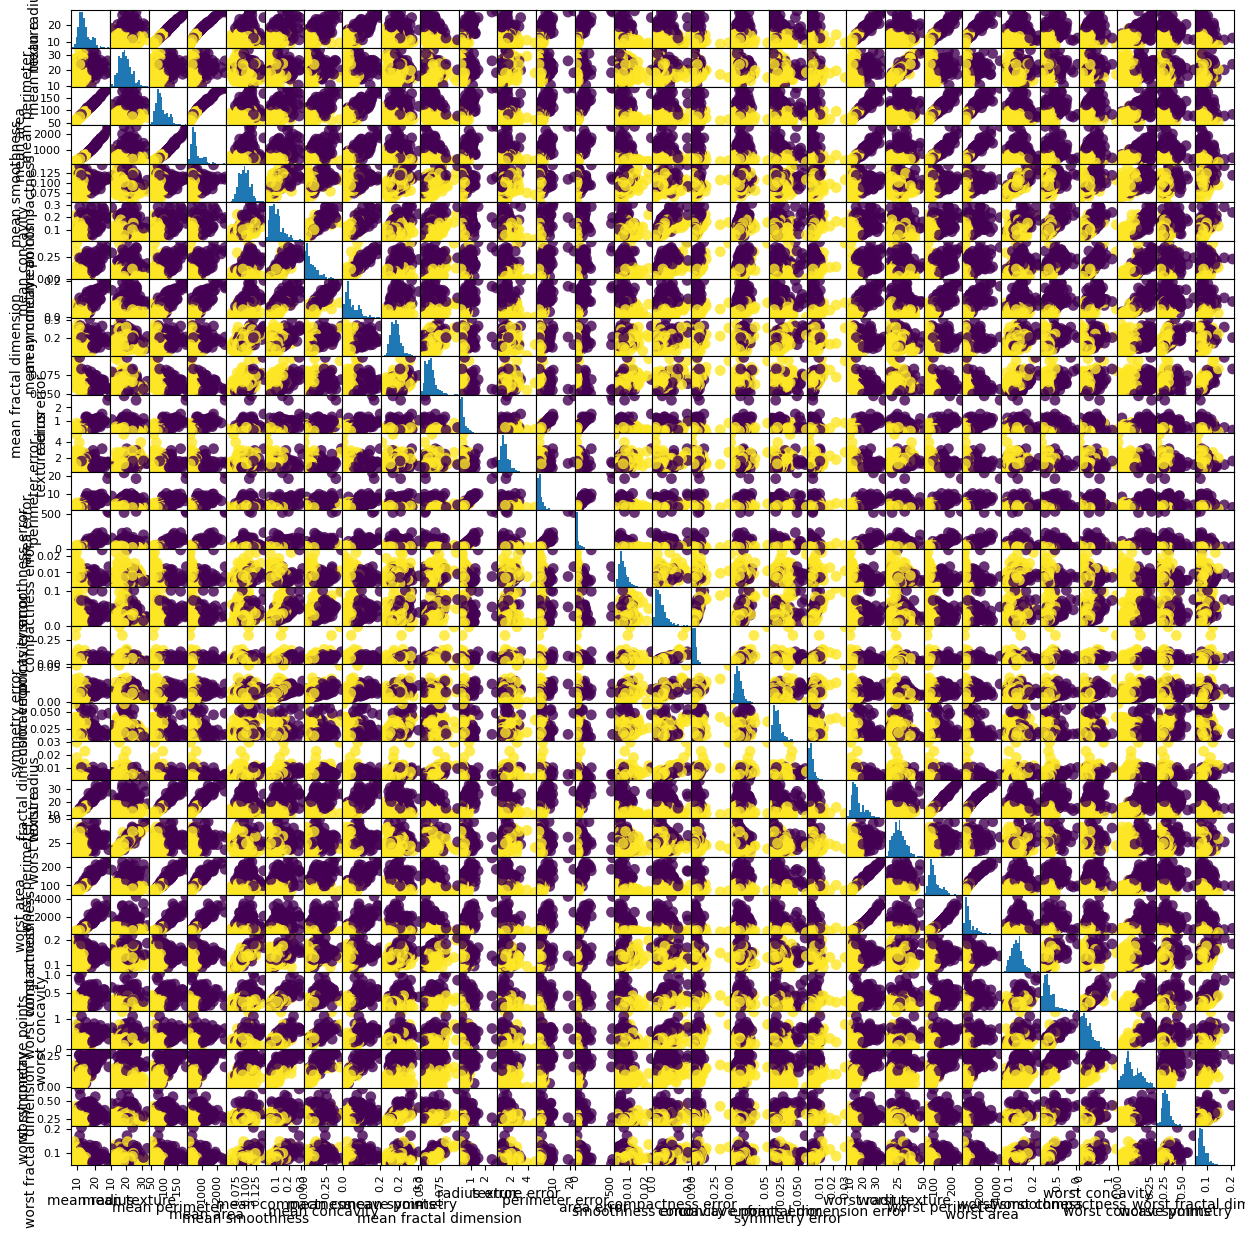

In [142]:
cancer_dataframe = pd.DataFrame(cancer_X_train, columns=cancer_dataset.feature_names)
grr = pd.plotting.scatter_matrix(cancer_dataframe, c=cancer_y_train, figsize=(15, 15), marker='0', hist_kwds={'bins':20}, s = 60, alpha=.8)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13112\3415840291.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(cancer_X_embedded[:, 0], cancer_X_embedded[:, 1], c=cancer_y_train,marker ='x', cmap=plt.cm.get_cmap("jet", 2))


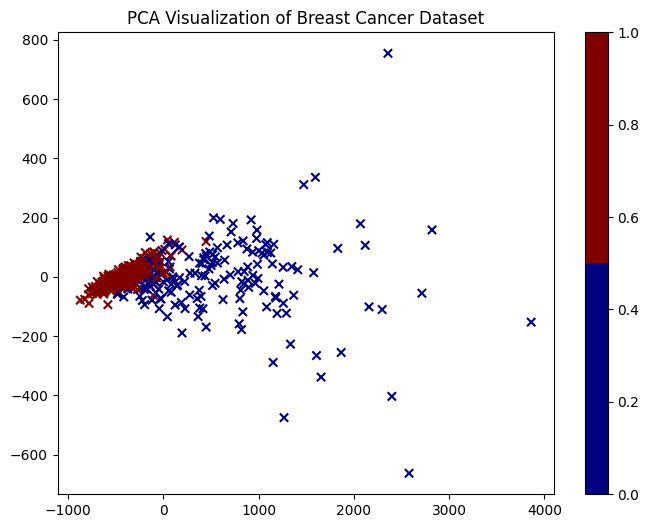

In [128]:
from sklearn.decomposition import PCA
cancer_X_embedded = PCA(n_components=2).fit_transform(cancer_X_train)
plt.figure(figsize=(8, 6))
plt.scatter(cancer_X_embedded[:, 0], cancer_X_embedded[:, 1], c=cancer_y_train,marker ='x', cmap=plt.cm.get_cmap("jet", 2))
plt.colorbar()
plt.title("PCA Visualization of Breast Cancer Dataset")
plt.show()

<h3>Этот код позволяет визуализировать данные о раке груди в двумерном пространстве, облегчая визуальное понимание и анализ структуры данных и их классификации.</h3>

<h1>Построение модели методом k-ближайших средних load_breast_cancer</h1>

In [106]:
knn.fit(cancer_X_train, cancer_y_train)

KNeighborsClassifier(n_neighbors=1)

<h1>Получение прогнозов load_breast_cancer</h1>

In [111]:
cancer_X_new = np.array([[14.0, 4, 6, 2.5, 9.1, 0.5, 4.5, 5, 2, 7.8, 3.7, 8.8, 6.3, 14.0, 4, 6, 2.5, 9.1, 0.5, 4.5, 5, 2, 7.8, 3.7, 8.8, 6.3, 1, 2, 3, 4]])
print(cancer_X_new.shape)

(1, 30)


In [112]:
cancer_prediction = knn.predict(cancer_X_new)
print("Прогноз: {}".format(cancer_prediction))
print("Спрогнозированная метка: {}".format(cancer_dataset['target_names'][cancer_prediction]))

Прогноз: [1]
Спрогнозированная метка: ['benign']


<h1>Оценка качества модели load_breast_cancer<h2>

In [113]:
cancer_y_pred = knn.predict(cancer_X_test)
print("Прогнозы для тестового набора: \n{}".format(cancer_y_pred))

Прогнозы для тестового набора: 
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [114]:
print("Правильность на тестовом наборе:{:.2f}".format(np.mean(cancer_y_pred==cancer_y_test)))

Правильность на тестовом наборе:0.92


In [115]:
print("Правильность на тестовом наборе:{:.2f}".format(knn.score(cancer_X_test, cancer_y_test)))

Правильность на тестовом наборе:0.92
